## Import of libraries and files

In [1]:
import os
import h5py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
open_folder = "../Data/Raw_Data/"
save_folder = "../Data/Temp_Data/"

if not os.path.exists(save_folder):
    os.mkdir(save_folder)
    print('Creation of dircetory %s successful.' % save_folder)

In [3]:
def openFileWithMultipleHeaders(path ):
    group_data = {}
    for head in mat_file.keys():
        group_data[head] = mat_file[head][:]
    return group_data

In [4]:
#import all .matlab-files from data folder
data = {}

mat_raw_files = (file for file in os.listdir(open_folder) if file[-4:] == '.mat' and "_Test_" in file)
for file in mat_raw_files:
    print(file)
    path = os.path.join(open_folder, file)
    mat_file = h5py.File(path, 'r')
    if len(mat_file.keys()) >1:
        group_data = openFileWithMultipleHeaders(path)
    else:
        group_data = mat_file[:]
    
    data[file[:-4]] = group_data

Daten_Test_ID_4b_1B_el.mat
Daten_Test_ID_4b_1B_th.mat
Daten_Test_ID_4b_2A_el_1.mat
Daten_Test_ID_4b_2A_el_2.mat
Daten_Test_ID_4b_2A_th.mat
Drehzahldaten_Test_ID_4b.mat
Leistungdaten_Test_ID_4b.mat


## General preperations
Such as splitting the data, provide universal nomenclature and other methods useful for all data set files

In [5]:
data_1B_el = data['Daten_Test_ID_4b_1B_el']
data_1B_th = data['Daten_Test_ID_4b_1B_th']
data_2A_el_1 = data['Daten_Test_ID_4b_2A_el_1']
data_2A_el_2 = data['Daten_Test_ID_4b_2A_el_2']
data_2A_th = data['Daten_Test_ID_4b_2A_th']
data_drehzahl = data['Drehzahldaten_Test_ID_4b']
data_power = data['Leistungdaten_Test_ID_4b']

## Seperate visualisation/adaptation for all data files and saving them in extra file in /Temp_Data/*

**Testdaten 1B_el (electrical output)**

The pure physical outputs as of voltage and amperage which show a periodical and symetrical stage

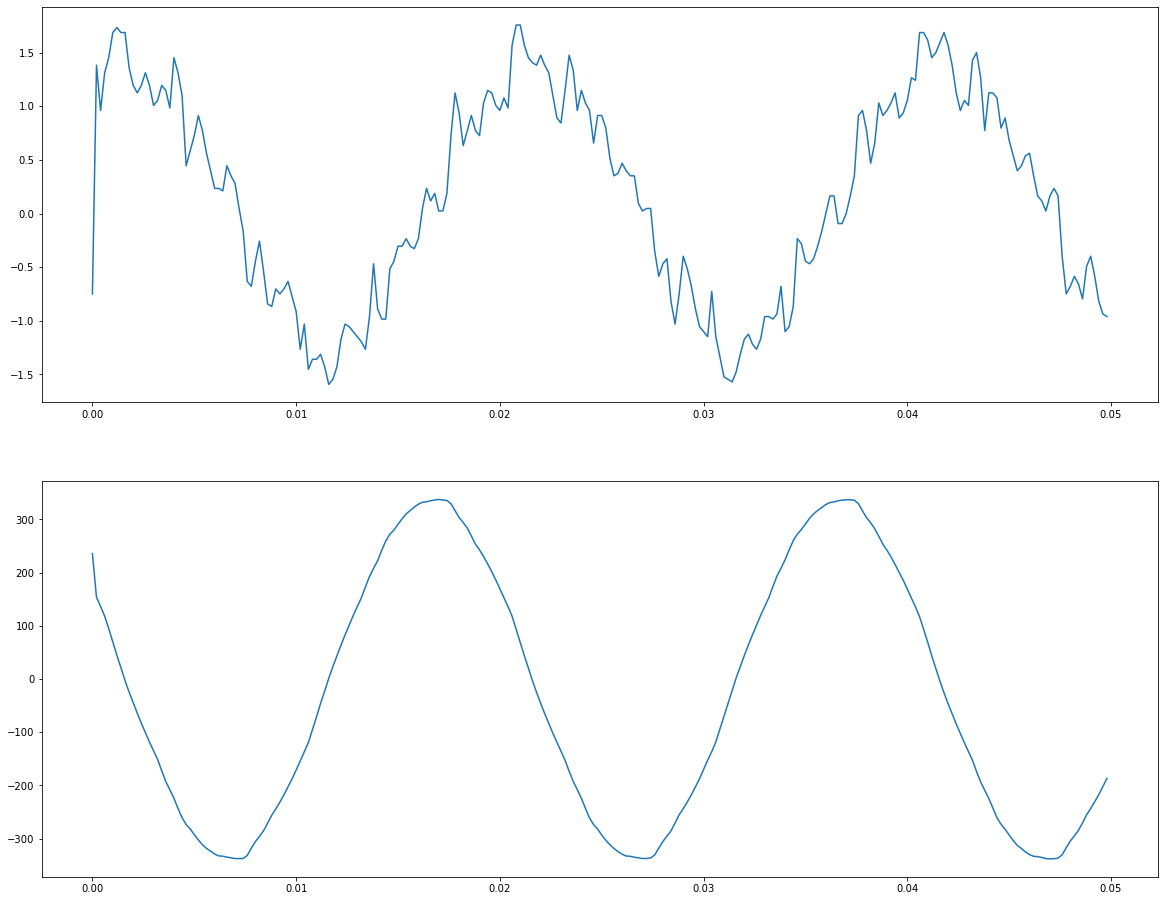

In [6]:
fig,axs = plt.subplots(2, 1, figsize = (20,16))
axs = axs.ravel()
axs[0].plot(data_1B_el['t_1B_el'][:250], data_1B_el['I_N15'][:250])
axs[1].plot(data_1B_el['t_1B_el'][:250], data_1B_el['U_N'][:250])
plt.show()

el_measures_1B = pd.DataFrame([{'el_time_measures': data_1B_el['t_1B_el'][::10],
                             'el_stromstaerke': data_1B_el['I_N15'][::10],
                            'el_spannung': data_1B_el['U_N'][::10]}])

el_measures_1B.to_csv(save_folder + "el_measures_1B.csv",
                     index = False, sep = "|", encoding = "utf-8")

**Testdaten 1B_th (thermical output)**

The thermical output depending on multiple data series. Not quite sure what they mean for now, but BP_34, BT_34 and BT_6 seem like they have some correlation with the total thermical output.

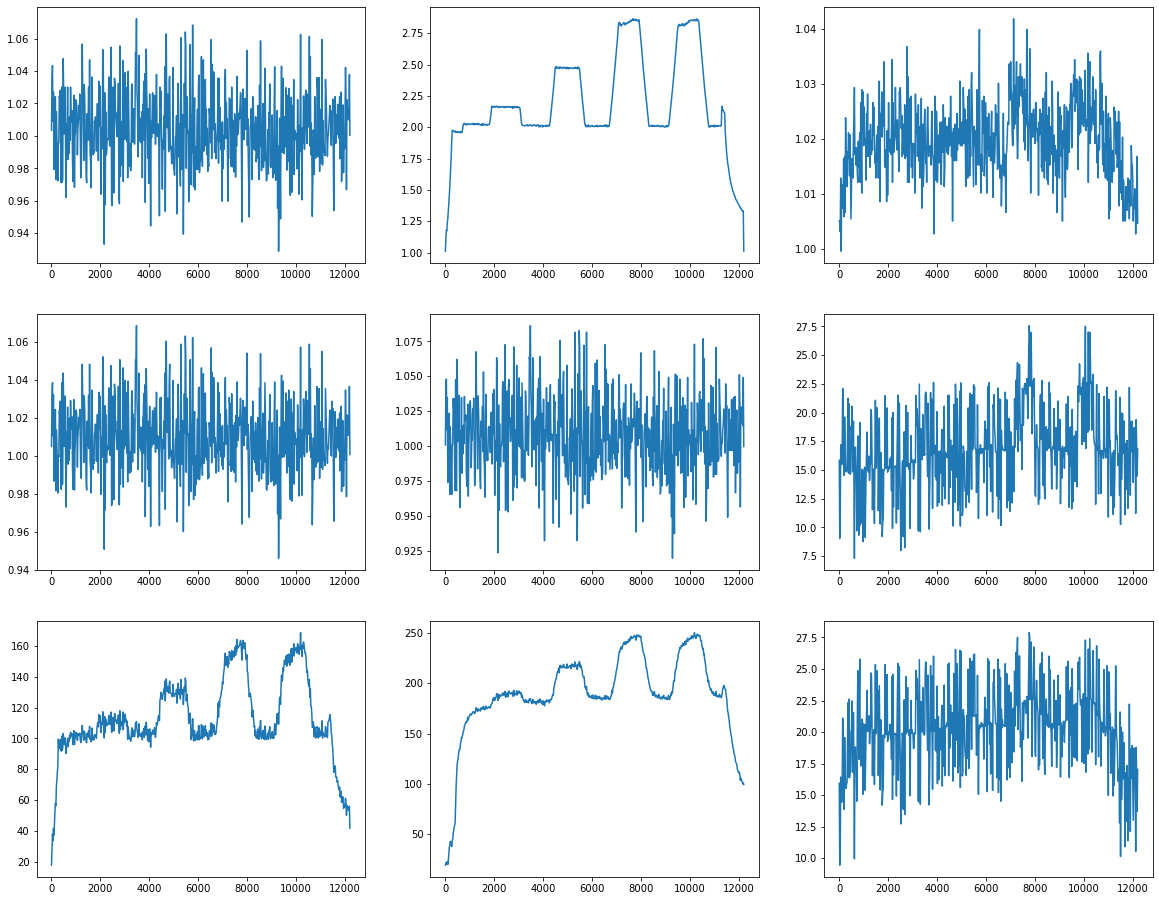

In [ ]:
fig,axs = plt.subplots(3, 3, figsize = (20,16))
axs = axs.ravel()
axs[0].plot(data_1B_th['t_1B_th'][::1000], data_1B_th['BP_2'][::1000])
axs[1].plot(data_1B_th['t_1B_th'][::1000], data_1B_th['BP_34'][::1000])
axs[2].plot(data_1B_th['t_1B_th'][::1000], data_1B_th['BP_5'][::1000])
axs[3].plot(data_1B_th['t_1B_th'][::1000], data_1B_th['BP_6'][::1000])
axs[4].plot(data_1B_th['t_1B_th'][::1000], data_1B_th['BP_7'][::1000])
axs[5].plot(data_1B_th['t_1B_th'][::1000], data_1B_th['BT_2'][::1000])
axs[6].plot(data_1B_th['t_1B_th'][::1000], data_1B_th['BT_34'][::1000])
axs[7].plot(data_1B_th['t_1B_th'][::1000], data_1B_th['BT_6'][::1000])
axs[8].plot(data_1B_th['t_1B_th'][::1000], data_1B_th['BT_7'][::1000])
plt.show()

th_measures_1B = pd.DataFrame([{'th_time_measures': data_1B_th['t_1B_th'][::200],
                             'th_BP2': data_1B_th['BP_2'][::200],
                             'th_BP34': data_1B_th['BP_34'][::200],
                             'th_BP5': data_1B_th['BP_5'][::200],
                             'th_BP6': data_1B_th['BP_6'][::200],
                             'th_BP7': data_1B_th['BP_7'][::200],
                             'th_BT2': data_1B_th['BT_2'][::200],
                             'th_BT34': data_1B_th['BT_34'][::200],
                             'th_BT6': data_1B_th['BT_6'][::200],
                             'th_BT7': data_1B_th['BT_7'][::200]}])

th_measures.to_csv(save_folder + "th_measures_1B.csv",
                     index = False, sep = "|", encoding = "utf-8")

**Testdaten 2A_el_1 (electrical output)**

The pure physical outputs as of voltage and amperage which show a periodical and symetrical stage

In [ ]:
fig,axs = plt.subplots(2, 2, figsize = (20,16))
axs = axs.ravel()
axs[0].plot(data_2A_el_1['t_2A_el_1'][:250], data_2A_el_1['I_G15'][:250])
axs[1].plot(data_2A_el_1['t_2A_el_1'][:250], data_2A_el_1['U_G'][:250])
axs[2].plot(data_2A_el_2['t_2A_el_2'][:250], data_2A_el_2['sw_MGT'][:250])
axs[3].plot(data_2A_el_2['t_2A_el_2'][:250], data_2A_el_2['U_ZK'][:250])
plt.show()

el_measures_2A_1 = pd.DataFrame([{'el_time_measures': data_2A_el_1['t_2A_el_1'][::2],
                             'el_stromstaerke': data_2A_el_1['I_G15'][::2],
                            'el_spannung': data_2A_el_1['U_G'][::2]}])

el_measures_2A_1.to_csv(save_folder + "el_measures_2A_1.csv",
                     index = False, sep = "|", encoding = "utf-8")

el_measures_2A_2 = pd.DataFrame([{'el_time_measures': data_2A_el_2['t_2A_el_2'][::2],
                             'el_spannung_input': data_2A_el_2['sw_MGT'][::2],
                            'el_spannung': data_2A_el_2['U_ZK'][::2]}])

el_measures_2A_2.to_csv(save_folder + "el_measures_2A_2.csv",
                     index = False, sep = "|", encoding = "utf-8")

**Testdaten 2A_th (thermical output)**

The thermical output depending on multiple data series. Not quite sure what they mean for now, but V_dotKW and T_vorKW seem relevant for cold starts

In [ ]:
fig,axs = plt.subplots(3, 3, figsize = (20,16))
axs = axs.ravel()
axs[0].plot(data_2A_th['t_2A_th'][::1000], data_2A_th['T_L'][::1000])
axs[1].plot(data_2A_th['t_2A_th'][::1000], data_2A_th['T_rueckKW'][::1000])
axs[2].plot(data_2A_th['t_2A_th'][::1000], data_2A_th['T_vorKW'][::1000])
axs[3].plot(data_2A_th['t_2A_th'][::1000], data_2A_th['V_dotB'][::1000])
axs[4].plot(data_2A_th['t_2A_th'][::1000], data_2A_th['V_dotKW'][::1000])
axs[5].plot(data_2A_th['t_2A_th'][::1000], data_2A_th['m_dotL'][::1000])
axs[6].plot(data_2A_th['t_2A_th'][::1000], data_2A_th['p_L'][::1000])
axs[7].plot(data_2A_th['t_2A_th'][::1000], data_2A_th['sw_kuehler'][::1000])
plt.show()

th_measures_2A = pd.DataFrame([{'th_time_measures': data_2A_th['t_2A_th'][::200],
                             'th_TL': data_2A_th['T_L'][::200],
                             'th_Trueck': data_2A_th['T_rueckKW'][::200],
                             'th_Tvor': data_2A_th['T_vorKW'][::200],
                             'th_VdotB': data_2A_th['V_dotB'][::200],
                             'th_VdotKW': data_2A_th['V_dotKW'][::200],
                             'th_mdotL': data_2A_th['m_dotL'][::200],
                             'th_pL': data_2A_th['p_L'][::200],
                             'th_swKuehler': data_2A_th['sw_kuehler'][::200]}])

th_measures_2A.to_csv(save_folder + "th_measures_2A.csv",
                     index = False, sep = "|", encoding = "utf-8")

**Drehzahldaten (rotation)**

We focus on rotation data, so data from File _'Drehzahldaten_Test_ID_4b'_

In [ ]:
fig,axs = plt.subplots(3, 1, figsize = (20,16))
axs = axs.ravel()
axs[0].plot(data_drehzahl['t_nsoll_stil'], data_drehzahl['sw_nsoll_stil'])
axs[1].plot(data_drehzahl['t_nsoll_stil'], data_drehzahl['n_4b_soll'])
axs[2].plot(data_drehzahl['t_stil'], data_drehzahl['n_stil'])
plt.show()

#save the 3 different timelines in 2 data frames
#(input voltage and measured rotation vs. smoothed rotation)
input_drehzahl = pd.DataFrame([{'nsoll_time': data_drehzahl['t_nsoll_stil'],
                  'nsoll_input_voltage': data_drehzahl['sw_nsoll_stil'],
                    'nsoll_measured': data_drehzahl['n_4b_soll']}])
approx_drehzahl = pd.DataFrame([{'nsoll_time': data_drehzahl['t_stil'],
                  'nsoll_approx': data_drehzahl['n_stil']}])


input_drehzahl.to_csv(save_folder + "input_drehzahl.csv",
                     index = False, sep = "|", encoding = "utf-8")
approx_drehzahl.to_csv(save_folder + "approx_drehzahl.csv",
                     index = False, sep = "|", encoding = "utf-8")

**Leistungsdaten (power)**

We focus on power data, so data from File _'Leistungsdaten_Test_ID_4b'_

In [ ]:
fig,axs = plt.subplots(3, 2, figsize = (20,12))
axs = axs.ravel()
axs[0].plot(data_power['t_elstil'], data_power['P_elstil'])
axs[1].plot(data_power['t_thstil'], data_power['P_thstil'])
axs[2].plot(data_power['t_1B_el_neu'], data_power['P_el_rms'])
axs[3].plot(data_power['t_1B_el_neu'], data_power['P_th'][: :2])
axs[4].plot(data_power['t_1B_el_neu'][::25], data_power['P_th_mean'])
plt.show()


el_output_raw = pd.DataFrame([{'el_time': data_power['t_1B_el_neu'][::25],
                  'el_power': data_power['P_el_rms'],
                    'th_power': data_power['P_th'],
                    'th_mean': data_power['P_th_mean']}])
el_output_approx = pd.DataFrame([{'el_time_approx': data_power['t_elstil'],
                  'el_power_approx': data_power['P_elstil'],
                    'th_power_approx': data_power['P_thstil']}])


el_output_raw.to_csv(save_folder + "el_output_raw.csv",
                     index = False, sep = "|", encoding = "utf-8")
el_output_approx.to_csv(save_folder + "el_output_approx.csv",
                     index = False, sep = "|", encoding = "utf-8")